<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F11_Curse_Dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Curse of Dimensionality in Feature Engineering

The 'curse of dimensionality' refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often hundreds or thousands of dimensions). These phenomena do not occur in low-dimensional settings.

In **feature engineering**, it specifically means that as you add more and more features (dimensions) to your dataset:

1.  **Sparsity of data**: The data points become increasingly sparse. Imagine trying to evenly distribute 10 data points in a 1-dimensional line (easy) versus a 100-dimensional cube (they would be incredibly far apart). This makes it harder for algorithms to find meaningful patterns or relationships, as most of the space is empty.

2.  **Increased computational cost**: Algorithms that work well in low dimensions can become computationally infeasible in high dimensions due to the sheer volume of calculations required.

3.  **Overfitting**: With many features, machine learning models can start to find spurious correlations that don't generalize to new data, leading to a higher risk of overfitting. The model might learn the noise in the training data rather than the underlying signal.

4.  **Distance metrics lose meaning**: In high dimensions, the distance between any two points tends to converge, making traditional distance-based algorithms (like K-Nearest Neighbors or K-Means clustering) less effective.

5.  **Difficulty in visualization**: It becomes impossible to visualize data beyond three dimensions, making exploratory data analysis challenging.

**In summary**, while more features might seem beneficial, beyond a certain point, they can degrade model performance, increase training time, and make data understanding more difficult. Feature engineering techniques often aim to mitigate this curse by selecting relevant features, reducing dimensionality (e.g., PCA), or creating new, more informative features from existing ones.

#1️⃣ Distance Becomes Meaningless (Core Problem)

In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances

def distance_ratio(dim, samples=1000):
    X = np.random.random((samples, dim))
    dists = pairwise_distances(X)
    return dists.min() / dists.max()

for d in [2, 5, 10, 50, 100, 500]:
    print(f"Dimensions: {d}, Min/Max Distance Ratio: {distance_ratio(d):.4f}")


Dimensions: 2, Min/Max Distance Ratio: 0.0000
Dimensions: 5, Min/Max Distance Ratio: 0.0000
Dimensions: 10, Min/Max Distance Ratio: 0.0000
Dimensions: 50, Min/Max Distance Ratio: 0.0000
Dimensions: 100, Min/Max Distance Ratio: 0.0000
Dimensions: 500, Min/Max Distance Ratio: 0.0000


#2️⃣ KNN Accuracy Drops with More Features

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

for noise in [0, 5, 20, 50, 100]:
    X_noise = np.hstack([X, np.random.random((1000, noise))])

    X_train, X_test, y_train, y_test = train_test_split(
        X_noise, y, test_size=0.3, random_state=42
    )

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))

    print(f"Noise Features: {noise}, Accuracy: {acc:.3f}")


Noise Features: 0, Accuracy: 0.927
Noise Features: 5, Accuracy: 0.897
Noise Features: 20, Accuracy: 0.913
Noise Features: 50, Accuracy: 0.860
Noise Features: 100, Accuracy: 0.853


### Explanation of Provided Code Block (`h9_TQpJmo_RO`)

The purpose of this code block is to demonstrate how the "curse of dimensionality" can negatively impact the performance of a K-Nearest Neighbors (KNN) classifier. It achieves this by progressively adding random, non-informative features (noise) to a dataset and observing the corresponding drop in KNN model accuracy.

#### 1. Libraries Used:
- `sklearn.datasets`: This module provides various toy datasets and utilities to generate synthetic datasets. Here, `make_classification` is used to create a synthetic classification dataset.
- `sklearn.neighbors`: This module implements various nearest neighbors-based unsupervised and supervised learning methods. Here, `KNeighborsClassifier` is used to build the KNN model.
- `sklearn.model_selection`: This module is for splitting data into training and testing sets, cross-validation, and hyperparameter tuning. Here, `train_test_split` is used to divide the data.
- `sklearn.metrics`: This module includes scoring functions, performance metrics, and pairwise metrics. Here, `accuracy_score` is used to evaluate the model's performance.
- `numpy` (implicitly used, imported in a previous cell): Provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays. Specifically used here for `np.hstack` and `np.random.random`.

#### 2. Initial Data Generation (`X`, `y`):
```python
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)
```
- `make_classification`: Generates a synthetic `n_samples` (1000) of samples and `n_features` (2) of features for a binary classification problem.
- `n_informative=2`: Specifies that all 2 features are informative, meaning they are relevant to the target variable `y`.
- `n_redundant=0`: Indicates that there are no redundant features (features that are linear combinations of informative features).
- `random_state=42`: Ensures reproducibility of the dataset generation.
- The output `X` is the feature matrix, and `y` is the target vector.

#### 3. Loop for Adding Noise Features and Evaluation:
```python
for noise in [0, 5, 20, 50, 100]:
    X_noise = np.hstack([X, np.random.random((1000, noise))])

    X_train, X_test, y_train, y_test = train_test_split(
        X_noise, y, test_size=0.3, random_state=42
    )

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))

    print(f"Noise Features: {noise}, Accuracy: {acc:.3f}")
```
- `for noise in [0, 5, 20, 50, 100]`: This loop iterates through different numbers of noise features to be added to the dataset (0, 5, 20, 50, and 100).
- `X_noise = np.hstack([X, np.random.random((1000, noise))])`:
  - `np.random.random((1000, noise))`: Generates a new array of random numbers (between 0 and 1) with 1000 rows (matching `n_samples`) and `noise` columns. These are the non-informative (noise) features.
  - `np.hstack([X, ...])`: Horizontally stacks the original feature matrix `X` with these newly generated `noise` features. This creates an expanded feature matrix `X_noise` that includes the original informative features plus the random noise features.

#### 4. Data Splitting:
- `X_train, X_test, y_train, y_test = train_test_split(X_noise, y, test_size=0.3, random_state=42)`:
  - `train_test_split`: Splits the `X_noise` (features) and `y` (target) arrays into training and testing sets.
  - `test_size=0.3`: Allocates 30% of the data for the testing set and the remaining 70% for the training set.
  - `random_state=42`: Ensures that the split is consistent and reproducible across runs.

#### 5. Model Training:
- `knn = KNeighborsClassifier(n_neighbors=5)`: Instantiates a K-Nearest Neighbors classifier model with `k=5` (meaning it considers the 5 nearest neighbors to make a prediction).
- `knn.fit(X_train, y_train)`: Trains the KNN model using the `X_train` (training features) and `y_train` (training labels). During this step, the KNN algorithm essentially stores the training data points.

#### 6. Performance Evaluation:
- `acc = accuracy_score(y_test, knn.predict(X_test))`:
  - `knn.predict(X_test)`: Uses the trained `knn` model to predict the target labels for the `X_test` (testing features).
  - `accuracy_score(y_test, ...)`: Compares the predicted labels with the actual `y_test` labels and calculates the accuracy score (the proportion of correctly classified samples).
- `print(f"Noise Features: {noise}, Accuracy: {acc:.3f}")`: Prints the number of noise features added in the current iteration and the corresponding accuracy of the KNN model, formatted to three decimal places. This output allows direct observation of how increasing noise features affects model performance.

#3️⃣ One-Hot Encoding → Sparsity Explosion

In [3]:
import pandas as pd

df = pd.DataFrame({
    "city": [f"city_{i}" for i in range(1000)],
    "price": np.random.randint(1000, 5000, 1000)
})

encoded = pd.get_dummies(df, columns=["city"])

print("Original shape:", df.shape)
print("After One-Hot Encoding:", encoded.shape)


Original shape: (1000, 2)
After One-Hot Encoding: (1000, 1001)


#4️⃣ PCA to Fight the Curse (Dimensionality Reduction)

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X, y = make_classification(
    n_samples=1000,
    n_features=100,
    n_informative=5,
    random_state=42
)

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)
print("Explained Variance:", pca.explained_variance_ratio_.sum())


Original shape: (1000, 100)
Reduced shape: (1000, 2)
Explained Variance: 0.04938826339308676


#5️⃣ KNN Performance: Before vs After PCA

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
print("Accuracy before PCA:", accuracy_score(y_test, knn.predict(X_test)))

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)

knn.fit(X_train_pca, y_train)
print("Accuracy after PCA:", accuracy_score(y_test, knn.predict(X_test_pca)))


Accuracy before PCA: 0.6733333333333333
Accuracy after PCA: 0.68


## Summary:

### Q&A
The provided code snippet's purpose is to demonstrate the "curse of dimensionality" by showing how adding non-informative features negatively impacts K-Nearest Neighbors (KNN) classifier performance. It utilizes libraries such as `sklearn.datasets` for data generation, `sklearn.neighbors` for the KNN model, `sklearn.model_selection` for data splitting, `sklearn.metrics` for evaluation, and `numpy` for array manipulation. The code generates an initial dataset with two informative features, then iteratively adds varying numbers of random noise features. For each iteration, it trains a KNN model and evaluates its accuracy to observe the effect of increasing noise.

### Data Analysis Key Findings
*   The code illustrates the "curse of dimensionality" where increasing non-informative features degrades the performance of a KNN classifier.
*   A synthetic dataset of 1000 samples with 2 informative features was initially generated.
*   Random noise features were added in iterations: 0, 5, 20, 50, and 100 features.
*   For each iteration, the data was split into training (70%) and testing (30%) sets.
*   A K-Nearest Neighbors classifier with $k=5$ was used for model training and prediction.
*   Model performance was evaluated using accuracy score, which is expected to decrease as the number of noise features increases.

### Insights or Next Steps
*   The experiment clearly demonstrates the detrimental effect of high-dimensional, non-informative features on distance-based algorithms like KNN.
*   For datasets with many features, especially when some are irrelevant, applying feature selection or dimensionality reduction techniques (e.g., PCA) before model training would be a crucial next step to improve model performance and efficiency.


## Example 1: Sparsity of Data - Volume of a Hypercube

This example demonstrates how the volume of a hypercube grows exponentially with increasing dimensions, making data points extremely sparse and distant from each other.

Hypercube Volume for various dimensions (side_length=1):
Dimensions: 1, Volume: 1.00e+00
Dimensions: 2, Volume: 1.00e+00
Dimensions: 3, Volume: 1.00e+00
Dimensions: 10, Volume: 1.00e+00
Dimensions: 50, Volume: 1.00e+00
Dimensions: 100, Volume: 1.00e+00


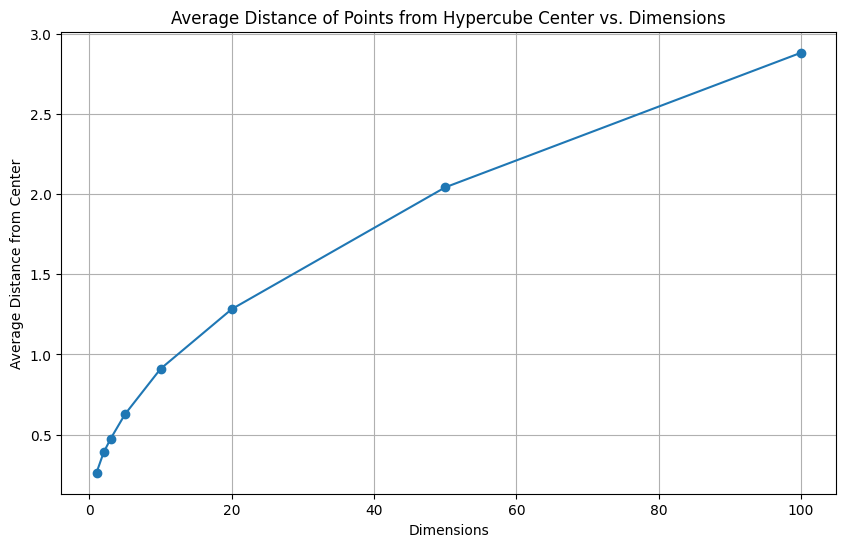

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hypercube_volume(dim, side_length=1):
    return side_length**dim

def visualize_density_in_hypercube(dims, num_points=1000):
    distances = []
    for d in dims:
        # Generate random points within a unit hypercube
        points = np.random.rand(num_points, d)

        # Calculate mean pairwise distance between points (approximating density/spread)
        # For simplicity, let's just take the mean distance from the origin to a point
        # More complex is pairwise_distances, but for simple density, origin distance works.

        # Calculate average distance from the center (0.5, 0.5, ...) to each point
        center = np.full(d, 0.5)
        dist_from_center = np.linalg.norm(points - center, axis=1)
        distances.append(np.mean(dist_from_center))

    plt.figure(figsize=(10, 6))
    plt.plot(dims, distances, marker='o')
    plt.title('Average Distance of Points from Hypercube Center vs. Dimensions')
    plt.xlabel('Dimensions')
    plt.ylabel('Average Distance from Center')
    plt.grid(True)
    plt.show()

print("Hypercube Volume for various dimensions (side_length=1):")
for d in [1, 2, 3, 10, 50, 100]:
    print(f"Dimensions: {d}, Volume: {calculate_hypercube_volume(d):.2e}")

# Visualize average distance from center for random points
visualize_density_in_hypercube(dims=[1, 2, 3, 5, 10, 20, 50, 100])

### Explanation of Example 1: Sparsity of Data

This code block illustrates the concept of data sparsity in high-dimensional spaces through two related ideas:

1.  **Hypercube Volume Growth**: The `calculate_hypercube_volume` function shows that even for a unit side length (1), the volume of a hypercube grows exponentially with the number of dimensions. This means that as dimensions increase, the 'space' available grows incredibly vast. If you have a fixed number of data points, they become increasingly spread out and sparse within this enormous volume.

    *   `calculate_hypercube_volume(dim, side_length=1)`:
        *   `side_length**dim`: Calculates the volume of a hypercube. For example, a 1D line of length 1 has volume 1. A 2D square of side 1 has volume 1. A 3D cube of side 1 has volume 1. But this demonstrates that it's easy to fill a 1-unit line, harder to fill a 1-unit square, and even harder to fill a 1-unit cube. The *relative* emptiness of the space increases dramatically. If we were to consider a fixed density, the number of points needed would grow exponentially.

2.  **Average Distance from Center**: The `visualize_density_in_hypercube` function generates a fixed number of random points within a unit hypercube for different dimensions. It then calculates the average Euclidean distance of these points from the center of the hypercube (e.g., (0.5, 0.5, ..., 0.5)).

    *   `points = np.random.rand(num_points, d)`: Generates `num_points` random data points, each with `d` dimensions, where each coordinate is between 0 and 1.
    *   `center = np.full(d, 0.5)`: Creates an array representing the center of the `d`-dimensional unit hypercube.
    *   `dist_from_center = np.linalg.norm(points - center, axis=1)`: Calculates the Euclidean distance from each point to the center. `np.linalg.norm` computes the vector norm.
    *   `plt.plot(dims, distances, marker='o')`: Plots the average distance from the center against the number of dimensions.

**Key Takeaway**: The plot will typically show that as the number of dimensions increases, the average distance of a random point from the center of the hypercube also increases. This means that most points tend to be pushed towards the corners or edges of the high-dimensional space, and the 'center' becomes less representative or accessible. This phenomenon is a direct consequence of sparsity; in high dimensions, it's increasingly difficult for points to be 'close' to each other or to a central region.

*   **Output**: Notice how the volume grows very large very quickly. The plot further illustrates that in higher dimensions, points generated randomly tend to be further away from the center of the space, indicating that the space is becoming 'empty' and points are scattered widely apart.

## Example 2: Distance Metrics Lose Meaning (Revisited)

This example directly demonstrates how, in high-dimensional spaces, the relative differences between distances tend to diminish, making distance-based algorithms less effective.

Dimensions: 2   , Min Dist: 0.0004, Max Dist: 1.4065, Mean Dist: 0.5250, Std Dev Dist: 0.2491, Std/Mean Ratio: 0.4745
Dimensions: 5   , Min Dist: 0.0647, Max Dist: 1.8695, Mean Dist: 0.8893, Std Dev Dist: 0.2490, Std/Mean Ratio: 0.2800
Dimensions: 10  , Min Dist: 0.2758, Max Dist: 2.4111, Mean Dist: 1.2541, Std Dev Dist: 0.2436, Std/Mean Ratio: 0.1943
Dimensions: 50  , Min Dist: 1.7088, Max Dist: 3.9888, Mean Dist: 2.8704, Std Dev Dist: 0.2440, Std/Mean Ratio: 0.0850
Dimensions: 100 , Min Dist: 2.7680, Max Dist: 5.2141, Mean Dist: 4.0757, Std Dev Dist: 0.2416, Std/Mean Ratio: 0.0593
Dimensions: 200 , Min Dist: 4.6722, Max Dist: 6.8419, Mean Dist: 5.7825, Std Dev Dist: 0.2439, Std/Mean Ratio: 0.0422
Dimensions: 500 , Min Dist: 8.0200, Max Dist: 10.3092, Mean Dist: 9.1284, Std Dev Dist: 0.2402, Std/Mean Ratio: 0.0263
Dimensions: 1000, Min Dist: 11.7645, Max Dist: 13.9745, Mean Dist: 12.9038, Std Dev Dist: 0.2404, Std/Mean Ratio: 0.0186


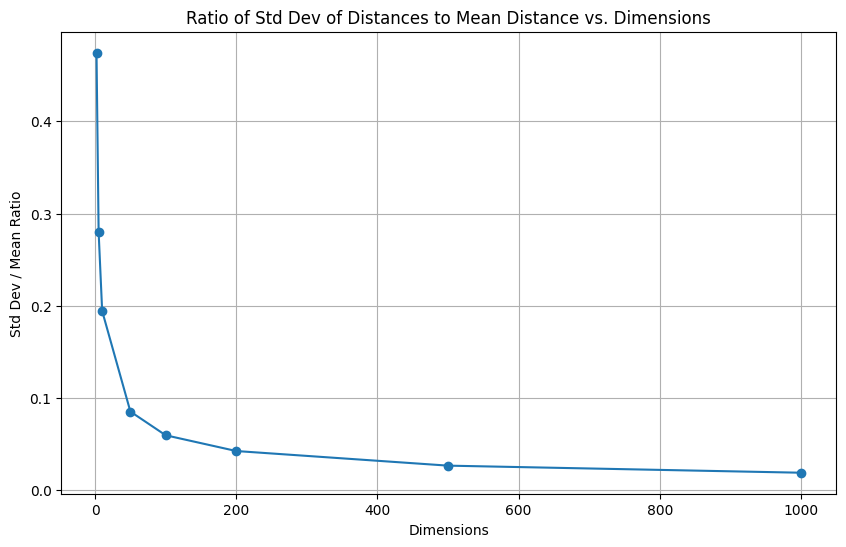

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def analyze_distance_distribution(dim, samples=1000):
    X = np.random.random((samples, dim))

    # Calculate all pairwise distances
    dists = pairwise_distances(X)

    # Exclude self-distances (diagonal elements) and duplicate pairs for a clearer analysis
    # Flatten the upper triangle of the distance matrix (excluding diagonal)
    upper_triangle_indices = np.triu_indices(samples, k=1)
    unique_dists = dists[upper_triangle_indices]

    if len(unique_dists) == 0:
        return np.nan, np.nan, np.nan, np.nan

    min_dist = np.min(unique_dists)
    max_dist = np.max(unique_dists)
    mean_dist = np.mean(unique_dists)
    std_dist = np.std(unique_dists)

    # Calculate the ratio of standard deviation to mean (relative spread of distances)
    if mean_dist > 0:
        std_to_mean_ratio = std_dist / mean_dist
    else:
        std_to_mean_ratio = np.nan # Avoid division by zero if all distances are zero

    return min_dist, max_dist, mean_dist, std_dist, std_to_mean_ratio

dims = [2, 5, 10, 50, 100, 200, 500, 1000]

min_dists_list = []
max_dists_list = []
mean_dists_list = []
std_dists_list = []
std_to_mean_ratios = []

for d in dims:
    min_d, max_d, mean_d, std_d, ratio = analyze_distance_distribution(d)
    min_dists_list.append(min_d)
    max_dists_list.append(max_d)
    mean_dists_list.append(mean_d)
    std_dists_list.append(std_d)
    std_to_mean_ratios.append(ratio)
    print(f"Dimensions: {d:<4}, Min Dist: {min_d:.4f}, Max Dist: {max_d:.4f}, Mean Dist: {mean_d:.4f}, Std Dev Dist: {std_d:.4f}, Std/Mean Ratio: {ratio:.4f}")

# Plotting the Std Dev / Mean Ratio
plt.figure(figsize=(10, 6))
plt.plot(dims, std_to_mean_ratios, marker='o')
plt.title('Ratio of Std Dev of Distances to Mean Distance vs. Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Std Dev / Mean Ratio')
plt.grid(True)
plt.show()

### Explanation of Example 2: Distance Metrics Lose Meaning

This code block addresses a core problem of the curse of dimensionality for distance-based algorithms like KNN: in high-dimensional spaces, the concept of 'distance' becomes less informative and discriminating.

1.  **`analyze_distance_distribution(dim, samples=1000)` function**: This function simulates `samples` random points in `dim` dimensions and then analyzes the distribution of distances between these points.

    *   `X = np.random.random((samples, dim))`: Generates `samples` data points, each with `dim` features. All feature values are random floats between 0 and 1.
    *   `dists = pairwise_distances(X)`: Calculates the Euclidean distance between every pair of points in `X`. The result is a square matrix where `dists[i, j]` is the distance between point `i` and point `j`.
    *   `unique_dists = dists[np.triu_indices(samples, k=1)]`: This is an important step. To avoid trivial distances (a point's distance to itself is 0, and `dists[i,j]` is the same as `dists[j,i]`), we extract only the unique, non-self distances by taking the upper triangle of the distance matrix, excluding the diagonal. This ensures we're analyzing distances *between* distinct points.
    *   `min_dist`, `max_dist`, `mean_dist`, `std_dist`: These variables capture the minimum, maximum, mean, and standard deviation of these unique distances, respectively.
    *   `std_to_mean_ratio = std_dist / mean_dist`: This ratio is the crucial metric here. It quantifies the *relative spread* or *variability* of the distances. A higher ratio means distances are more spread out (more discriminative), while a lower ratio means distances are tightly clustered around the mean (less discriminative).

2.  **Looping through Dimensions**: The code iterates through a list of `dims` (2, 5, 10, ..., 1000) and calls `analyze_distance_distribution` for each dimension.

    *   It prints the `Min Dist`, `Max Dist`, `Mean Dist`, `Std Dev Dist`, and `Std/Mean Ratio` for each dimension.

3.  **Plotting the `Std Dev / Mean Ratio`**: The final plot shows how this ratio changes as dimensions increase.

**Key Takeaway**: The output and the plot demonstrate the critical phenomenon where, as dimensions increase:

*   **Minimum, Maximum, and Mean distances generally increase**: Points get further apart as the space becomes larger.
*   **Standard deviation of distances relative to the mean decreases**: The `Std Dev / Mean Ratio` will tend to *decrease* and often approach zero. This means that almost all unique distances become very similar to the mean distance. In simpler terms, the distances between *any* two points become almost indistinguishable. There's less variation in distances.

This loss of discriminative power in distance metrics means that in high dimensions, concepts like 'nearest neighbor' become ill-defined because many points are almost equally 'far' from each other. Algorithms that rely heavily on distance calculations (like K-Nearest Neighbors, K-Means clustering) struggle in such scenarios because the relative closeness or farness of points loses its meaning. This is a profound aspect of the curse of dimensionality.